In [50]:
import pandas as pd
from persiantools.jdatetime import JalaliDate


In [16]:
GoldCoinPrice = pd.read_csv(r"C:\Users\Aleph.LAPTOP-5AKK0J1L\Desktop\Option Pricing\GoldCoinPrice.csv")
GoldCoinOptions = pd.read_csv(r"C:\Users\Aleph.LAPTOP-5AKK0J1L\Desktop\Option Pricing\GoldCoinOptions.csv")

In [17]:
#Convert string prices to the number format
GoldCoinPrice[['Open', 'Low', 'High', 'Close','Change','ChangePercent']] = GoldCoinPrice[['Open', 'Low', 'High', 'Close','Change','ChangePercent']].replace({',': '', '%':'',"-":''}, regex=True).apply(pd.to_numeric)


In [4]:
GoldCoinPrice

,Date,Open,Low,High,Close,Change,ChangePercent
0,1397/01/14,17310000,17290000,17460000,17360000,70000.0,0.40
1,1397/01/15,17390000,17390000,17490000,17490000,130000.0,0.75
2,1397/01/16,17390000,17390000,17390000,17390000,100000.0,0.58
3,1397/01/17,17560000,17550000,17910000,17830000,440000.0,2.53
4,1397/01/18,18050000,18050000,19560000,19300000,1470000.0,8.24
...,...,...,...,...,...,...,...
1915,1403/01/16,449980000,449910000,462100000,458080000,19200000.0,4.37
1916,1403/01/18,453950000,441800000,456100000,448060000,10020000.0,2.24
1917,1403/01/19,447930000,42450000,448100000,419970000,28090000.0,6.69
1918,1403/01/20,419020000,408810000,422080000,415800000,4170000.0,1.00


In [18]:
#Add some descriptive features to the data
GoldCoinOptions['ContractType'] = [GoldCoinOptions['قرارداد'][i][6] for i in range(GoldCoinOptions.shape[0])]
GoldCoinOptions['StrikePrice'] = [int(GoldCoinOptions['قرارداد'][i][7:])*10000 for i in range(GoldCoinOptions.shape[0])]

# Now that we extract those informative variables we can remove 'قرارداد' features
GoldCoinOptions = GoldCoinOptions.drop(['قرارداد','شرح'],axis=1)


OptionNumericalFeatures = ['حجم', 'ارزش(ریال)', 'بالاترین(ریال)', 'پایین ترین(ریال)',
       'آخرین(ریال)', 'اولین(ریال)', 'موقعیتهای باز', 'درصد تغییر',
       'تعداد مشتریان فعال', 'تعداد کارگزاران فعال', 'تعداد خریداران',
       'تعداد فروشندگان', 'قیمت تسویه (ریال)', 'درصد تغییر قیمت تسویه',
         '#!ارزش معاملات مشتریان حقیقی(خرید)(ریال)',
       '#!ارزش معاملات مشتریان حقیقی(فروش)(ریال)']
GoldCoinOptions[OptionNumericalFeatures] = GoldCoinOptions[OptionNumericalFeatures].replace({',': '', '%':'',"-":''}, regex=True).apply(pd.to_numeric)
GoldCoinOptions

,حجم,ارزش(ریال),بالاترین(ریال),پایین ترین(ریال),آخرین(ریال),اولین(ریال),موقعیتهای باز,درصد تغییر,تعداد مشتریان فعال,تعداد کارگزاران فعال,تعداد خریداران,تعداد فروشندگان,قیمت تسویه (ریال),درصد تغییر قیمت تسویه,تاریخ,تاریخ اعمال,#!ارزش معاملات مشتریان حقیقی(خرید)(ریال),#!ارزش معاملات مشتریان حقیقی(فروش)(ریال),ContractType,StrikePrice
0,0,0,0,0,0,0,39,0,21,7,0,0,4900000,0.00,1398/01/15,1398/02/16,0,0,C,46000000
1,11,54040000,5500000,4700000,4890000,5500000,40,0,22,10,5,1,4912727,18.12,1398/01/15,1398/02/16,54040000,54040000,C,44000000
2,14,34763400,2899400,2300000,2300400,2899400,352,-6,51,11,8,3,2483100,8.62,1398/01/15,1398/02/16,34763400,34763400,C,48000000
3,0,0,0,0,0,0,17,0,13,4,0,0,1145568,0.00,1398/01/15,1398/02/16,0,0,P,44000000
4,0,0,0,0,0,0,5,0,5,3,0,0,1573415,8.38,1398/01/15,1398/02/16,0,0,P,46000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13127,0,0,0,0,0,0,0,0,0,0,0,0,4704485,0.00,1403/01/15,1403/04/10,0,0,P,410000000
13128,0,0,0,0,0,0,0,0,0,0,0,0,59770848,0.00,1403/01/15,1403/04/10,0,0,C,400000000
13129,0,0,0,0,0,0,0,0,0,0,0,0,3178143,0.00,1403/01/15,1403/04/10,0,0,P,400000000
13130,0,0,0,0,0,0,0,0,0,0,0,0,76335288,0.00,1403/01/15,1403/04/10,0,0,C,380000000


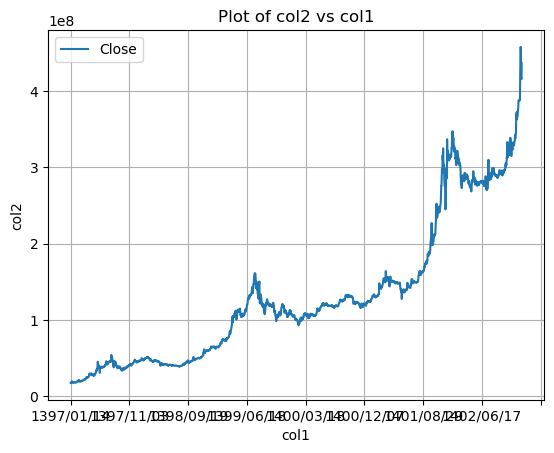

In [25]:
import matplotlib.pyplot as plt

# Plot col2 vs col1
GoldCoinPrice.plot(x='Date', y='Close', kind='line')
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Plot of col2 vs col1')
plt.grid(True)
plt.show()

### Add Profitability Feature
This feature will show us that if you buy or sell that contract, you make money or lose.\
Consider that we have assume that the contracts are only traded on the expiration time for simplicity.

In [41]:
Profitability = []
for i in range(GoldCoinOptions.shape[0]):

    #get the actual price of the expiration time of the contract
    ExpirationTime = GoldCoinOptions['تاریخ اعمال'][i]

    if ExpirationTime in GoldCoinPrice['Date'].values.tolist():
        ActualPrice = GoldCoinPrice['Close'][GoldCoinPrice[GoldCoinPrice['Date'] == ExpirationTime].index[0]]


        #Here we compare the strike price of gold coin in its expiration date with its actual price and label the profitability status of the ***buyer of the contract****
        
        #Call option contract
        if GoldCoinOptions['ContractType'][i] == 'C': 

            if ActualPrice - GoldCoinOptions['قیمت تسویه (ریال)'][i] > GoldCoinOptions['StrikePrice'][i]:

                Profitability.append(1)
            else:
                Profitability.append(0)

        #Put option contract
        else: 

            if GoldCoinOptions['StrikePrice'][i] - GoldCoinOptions['قیمت تسویه (ریال)'][i] > ActualPrice:

                Profitability.append(1)
            else:
                Profitability.append(0)
    else:

        #Rows with expiration date in future can not be categorized by their profitability, they are for final forcasting 
        Profitability.append('Unknow')
        

#now we add the new feature to our option dataframe

GoldCoinOptions['Profitability'] = Profitability


## Add Time Duration Feature
Calculate the number of days to expiration date 

In [51]:
# Function to convert Persian date to Gregorian date
def persian_to_gregorian(date_str):
    year, month, day = map(int, date_str.split('/'))
    j_date = JalaliDate(year, month, day)
    g_date = j_date.to_gregorian()
    return f"{g_date.year}-{g_date.month:02}-{g_date.day:02}"

# Convert columns to Gregorian date strings
GoldCoinOptions['date1_gregorian'] = GoldCoinOptions['تاریخ'].apply(persian_to_gregorian)
GoldCoinOptions['date2_gregorian'] = GoldCoinOptions['تاریخ اعمال'].apply(persian_to_gregorian)

# Convert Gregorian date strings to datetime objects
GoldCoinOptions['date1'] = pd.to_datetime(GoldCoinOptions['date1_gregorian'])
GoldCoinOptions['date2'] = pd.to_datetime(GoldCoinOptions['date2_gregorian'])

# Calculate the difference in days
GoldCoinOptions['ContractDurationDays'] = (GoldCoinOptions['date2'] - GoldCoinOptions['date1']).dt.days

# Drop intermediate columns
GoldCoinOptions.drop(['date1_gregorian', 'date2_gregorian','date1','date2'], axis=1, inplace=True)

GoldCoinOptions


,حجم,ارزش(ریال),بالاترین(ریال),پایین ترین(ریال),آخرین(ریال),اولین(ریال),موقعیتهای باز,درصد تغییر,تعداد مشتریان فعال,تعداد کارگزاران فعال,...,قیمت تسویه (ریال),درصد تغییر قیمت تسویه,تاریخ,تاریخ اعمال,#!ارزش معاملات مشتریان حقیقی(خرید)(ریال),#!ارزش معاملات مشتریان حقیقی(فروش)(ریال),ContractType,StrikePrice,Profitability,ContractDurationDays
0,0,0,0,0,0,0,39,0,21,7,...,4900000,0.00,1398/01/15,1398/02/16,0,0,C,46000000,1,32
1,11,54040000,5500000,4700000,4890000,5500000,40,0,22,10,...,4912727,18.12,1398/01/15,1398/02/16,54040000,54040000,C,44000000,1,32
2,14,34763400,2899400,2300000,2300400,2899400,352,-6,51,11,...,2483100,8.62,1398/01/15,1398/02/16,34763400,34763400,C,48000000,1,32
3,0,0,0,0,0,0,17,0,13,4,...,1145568,0.00,1398/01/15,1398/02/16,0,0,P,44000000,0,32
4,0,0,0,0,0,0,5,0,5,3,...,1573415,8.38,1398/01/15,1398/02/16,0,0,P,46000000,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13127,0,0,0,0,0,0,0,0,0,0,...,4704485,0.00,1403/01/15,1403/04/10,0,0,P,410000000,Unknow,88
13128,0,0,0,0,0,0,0,0,0,0,...,59770848,0.00,1403/01/15,1403/04/10,0,0,C,400000000,Unknow,88
13129,0,0,0,0,0,0,0,0,0,0,...,3178143,0.00,1403/01/15,1403/04/10,0,0,P,400000000,Unknow,88
13130,0,0,0,0,0,0,0,0,0,0,...,76335288,0.00,1403/01/15,1403/04/10,0,0,C,380000000,Unknow,88


In [52]:
GoldCoinOptions.to_csv(r"C:\Users\Aleph.LAPTOP-5AKK0J1L\Desktop\Option Pricing\GoldCoinOptions1.csv",index=False)

In [53]:
GoldCoinPrice.to_csv(r"C:\Users\Aleph.LAPTOP-5AKK0J1L\Desktop\Option Pricing\GoldCoinPric1.csv",index=False)